# **Lab: Transfer Learning with a Pre-Trained Deep Neural Network**

In [ ]:
from google.colab import drive

drive.mount("/content/gdrive")
%cd "/content/gdrive/My Drive/Datasets/Conv"

Mounted at /content/gdrive
/content/gdrive/My Drive/Datasets/Conv


In [ ]:
!pip install flickrapi

     |████████████████████████████████| 61kB 9.0MB/s 


In [ ]:
import flickrapi
import urllib.request
import matplotlib.pyplot as plt
import numpy as np
import skimage.io
import skimage.transform
import requests
from io import BytesIO
%matplotlib inline

# Downloading and saving data 

Do not run if already downloaded

In [ ]:
api_key = u'518708e2c5e646552d4edab21d3cc11f'
api_secret = u'**********'
flickr = flickrapi.FlickrAPI(api_key, api_secret)

In [ ]:
dir_main = ['train', 'test']
dir_sub = ['car', 'bicycle']  

In [ ]:
import os
for dir in dir_main: 
  dir_exists = os.path.isdir(dir)
  if not dir_exists:
    print("Will not store images in directory - %s" % dir) 
  else:
    print("Will store images in directory - %s" % dir)

Will store images in directory - train
Will store images in directory - test


In [ ]:
keyword = ['car', 'bicycle']
photos_car = flickr.walk(text=keyword[0], tag_mode='all', tags=keyword,extras='url_c',\
                     sort='relevance',per_page=1000)
photos_bicycle = flickr.walk(text=keyword[1], tag_mode='all', tags=keyword,extras='url_c',\
                     sort='relevance',per_page=1000)
photos = [photos_car, photos_bicycle]

Saving images

In [ ]:
import warnings
    
nimage = [1000, 300]
nrow = 224
ncol = 224

for j, k in enumerate(keyword):
  photos1 = photos[j]
  m = 0
  i = 0
  for num, dir in enumerate(dir_main):
    m = i
    i = 0  
    for photo in photos1:
          url=photo.get('url_c')
          if not (url is None):
              
              response = requests.get(url)
              file = BytesIO(response.content)
              
              im = skimage.io.imread(file)
              
              im1 = skimage.transform.resize(im,(nrow,ncol),mode='constant')
                      
              with warnings.catch_warnings():
                  warnings.simplefilter("ignore")
                  im2 = skimage.img_as_ubyte(im1)
          
              local_name = '{0:s}/{1:s}/{1:s}_{2:04d}.jpg'.format(dir,k,m)  
              skimage.io.imsave(local_name, im2)      
              #print(local_name)
              i = i + 1
              m = m + 1         
          if (i >= nimage[num]):        
              break
print("Images downloaded")

# Loading a Pre-Trained Deep Network

In [ ]:
import tensorflow as tf

from tensorflow.python.client import device_lib
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 11819158271290223550
, name: "/device:XLA_CPU:0"
device_type: "XLA_CPU"
memory_limit: 17179869184
locality {
}
incarnation: 9096812825416696041
physical_device_desc: "device: XLA_CPU device"
, name: "/device:XLA_GPU:0"
device_type: "XLA_GPU"
memory_limit: 17179869184
locality {
}
incarnation: 15070844979036283872
physical_device_desc: "device: XLA_GPU device"
, name: "/device:GPU:0"
device_type: "GPU"
memory_limit: 14640891840
locality {
  bus_id: 1
  links {
  }
}
incarnation: 1993148215911870186
physical_device_desc: "device: 0, name: Tesla T4, pci bus id: 0000:00:04.0, compute capability: 7.5"
]


In [ ]:
from tensorflow.keras import applications
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, Dense
import tensorflow.keras.backend as K

Clearing the session

In [ ]:
K.clear_session()

Setting the dimensions of input image

In [ ]:
nrow = 150
ncol = 150

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import decode_predictions, preprocess_input

In [ ]:
input_shape = (nrow,ncol,3)
base_model = applications.VGG16(include_top=False,weights='imagenet',input_shape=input_shape)

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
bn = []
for layer in base_model.layers:
    bn.append(layer)
model = Sequential(bn)
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 37, 37, 256)       2

In [ ]:
for layer in model.layers:
  layer.trainable = False
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 37, 37, 256)       2

Adding new layers

In [ ]:
model.add(Flatten(name='Flat_ten'))
model.add(Dense(units=256,activation='relu',name='Full_con'))
model.add(Dropout(rate=0.5,name='Drop'))
model.add(Dense(units=1,activation='sigmoid',name='Output'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 37, 37, 256)       2

Using Generators to load data

In [ ]:
train_data_dir = './train'
batch_size = 32
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
train_generator = train_datagen.flow_from_directory(train_data_dir,target_size=(nrow,ncol),batch_size=batch_size,
                                                    class_mode='binary')

Found 2000 images belonging to 2 classes.


In [ ]:
test_data_dir = './test'
test_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_generator = test_datagen.flow_from_directory(test_data_dir,target_size=(nrow,ncol),batch_size=batch_size,
                                                    class_mode='binary')

Found 600 images belonging to 2 classes.


Displaying Images

1.0


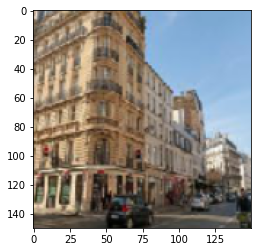

0.0


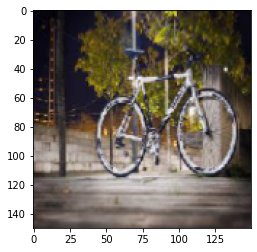

1.0


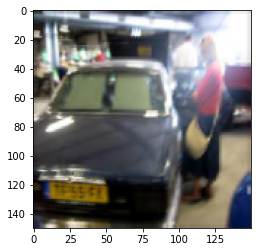

1.0


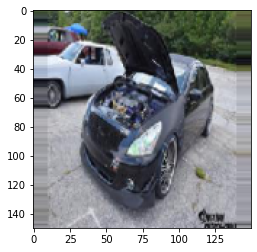

0.0


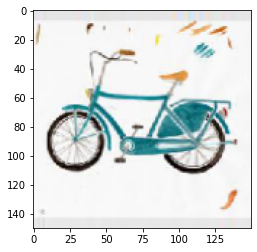

1.0


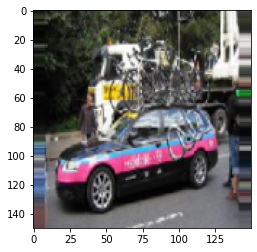

0.0


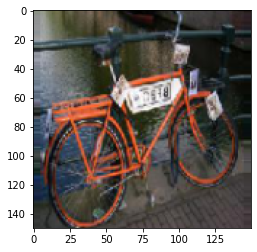

1.0


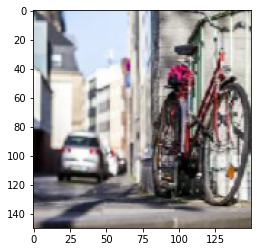

In [ ]:
X,y = train_generator.next()

for i in range(0,8):
    image = X[i]
    label = y[i] 
    print (label)
    plt.imshow(image)
    plt.show()

In [ ]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
steps_per_epoch =  train_generator.n // train_generator.batch_size
validation_steps =  test_generator.n // test_generator.batch_size

In [ ]:
hist = model.fit(train_generator, steps_per_epoch=steps_per_epoch, epochs=10, validation_data=test_generator, validation_steps=validation_steps)

Epoch 1/10
62/62 [==============================] - 553s 9s/step - loss: 0.3890 - accuracy: 0.8526 - val_loss: 0.1150 - val_accuracy: 0.9601
Epoch 2/10
62/62 [==============================] - 19s 314ms/step - loss: 0.1632 - accuracy: 0.9309 - val_loss: 0.1127 - val_accuracy: 0.9549
Epoch 3/10
62/62 [==============================] - 19s 309ms/step - loss: 0.1266 - accuracy: 0.9492 - val_loss: 0.0932 - val_accuracy: 0.9670
Epoch 4/10
62/62 [==============================] - 19s 305ms/step - loss: 0.1141 - accuracy: 0.9517 - val_loss: 0.1136 - val_accuracy: 0.9670
Epoch 5/10
62/62 [==============================] - 19s 305ms/step - loss: 0.0999 - accuracy: 0.9588 - val_loss: 0.1759 - val_accuracy: 0.9358
Epoch 6/10
62/62 [==============================] - 19s 305ms/step - loss: 0.0916 - accuracy: 0.9639 - val_loss: 0.0737 - val_accuracy: 0.9670
Epoch 7/10
62/62 [==============================] - 19s 307ms/step - loss: 0.0917 - accuracy: 0.9607 - val_loss: 0.1017 - val_accuracy: 0.9653
E

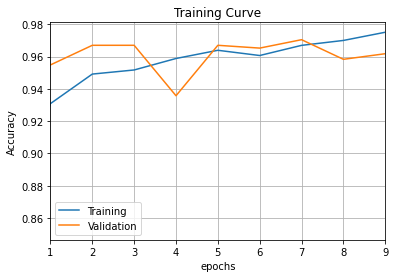

In [ ]:
epochsn=np.arange(10)
plt.plot(epochsn,hist.history['accuracy'])
plt.plot(epochsn,hist.history['val_accuracy'])
plt.xlim((1, 9))

plt.grid()
plt.xlabel('epochs')
plt.ylabel('Accuracy')
plt.title('Training Curve')
plt.legend(['Training', 'Validation'])

plt.show()

Plotting Error Images

In [ ]:
Xts, yts = train_generator.next()

yhat = model.predict(Xts)

d = []

In [ ]:
yhat1 = np.rint(yhat)
m = Xts.shape[0]

for i in range(m):
  if yhat1[i] != yts[i]:
     d.append(i)

Actual = 0.0, Predicted = 0.9823136925697327 


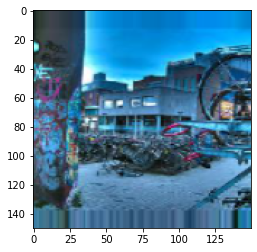

In [36]:
for i in d:    
  image = Xts[i]
  label = yts[i]
  predict = yhat[i] 
  plt.imshow(image)
  print("Actual = {}, Predicted = {} ".format(label, predict[0]))
  plt.show()